In [1]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import os

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')

numpy: 2.3.2
pandas: 2.3.1
scipy: 1.16.1
scikit-learn: 1.7.1
seaborn: 0.13.2


In [2]:
os.chdir("../data")
print(os.getcwd())

/workspaces/4Geeks_final_project/data


In [3]:
df = pd.read_csv("training_data", encoding='latin1')

df.head()

,Unnamed: 0,Sales,Turnaround_Time,State_encoded,Postal_Code_encoded,Ship_Mode_first class,Ship_Mode_same day,Ship_Mode_second class,Ship_Mode_standard class,Category_furniture,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,0,261.9600,3.0,15.0,215.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,731.9400,3.0,15.0,215.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,14.6200,4.0,3.0,512.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,957.5775,7.0,8.0,168.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,22.3680,7.0,8.0,168.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


pp = df[["Postal_Code_encoded","State_encoded", "Category_furniture", "Category_office supplies","Category_technology", "Sales"]]

In [4]:
pp = df.drop(["Turnaround_Time", "Unnamed: 0"], errors='ignore', axis = 1)

In [5]:
pp.head().transpose()

,0,1,2,3,4
Sales,261.96,731.94,14.62,957.5775,22.368
State_encoded,15.00,15.00,3.00,8.0000,8.000
Postal_Code_encoded,215.00,215.00,512.00,168.0000,168.000
Ship_Mode_first class,0.00,0.00,0.00,0.0000,0.000
Ship_Mode_same day,0.00,0.00,0.00,0.0000,0.000
Ship_Mode_second class,1.00,1.00,1.00,0.0000,0.000
Ship_Mode_standard class,0.00,0.00,0.00,1.0000,1.000
Category_furniture,1.00,1.00,0.00,1.0000,0.000
Category_office supplies,0.00,0.00,1.00,0.0000,1.000
Category_technology,0.00,0.00,0.00,0.0000,0.000


In [6]:
from sklearn.model_selection import train_test_split

X = pp.drop("Sales", axis = 1)
y = pp["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.80)

In [7]:
X.head()

,State_encoded,Postal_Code_encoded,Ship_Mode_first class,Ship_Mode_same day,Ship_Mode_second class,Ship_Mode_standard class,Category_furniture,Category_office supplies,Category_technology,Sub_Category_accessories,...,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,15.0,215.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,215.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,512.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,168.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.0,168.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State_encoded             9557 non-null   float64
 1   Postal_Code_encoded       9557 non-null   float64
 2   Ship_Mode_first class     9557 non-null   float64
 3   Ship_Mode_same day        9557 non-null   float64
 4   Ship_Mode_second class    9557 non-null   float64
 5   Ship_Mode_standard class  9557 non-null   float64
 6   Category_furniture        9557 non-null   float64
 7   Category_office supplies  9557 non-null   float64
 8   Category_technology       9557 non-null   float64
 9   Sub_Category_accessories  9557 non-null   float64
 10  Sub_Category_appliances   9557 non-null   float64
 11  Sub_Category_art          9557 non-null   float64
 12  Sub_Category_binders      9557 non-null   float64
 13  Sub_Category_bookcases    9557 non-null   float64
 14  Sub_Cate

In [9]:
y

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9552      3.7980
9553     10.3680
9554    235.1880
9555     26.3760
9556     10.3840
Name: Sales, Length: 9557, dtype: float64

In [10]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state = 42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [11]:
y_pred = model.predict(X_test)
y_pred

array([901.4137  , 202.86217 ,  80.96738 , ..., 169.7602  ,   6.499931,
       276.22394 ], shape=(1912,), dtype=float32)

In [12]:
from sklearn.metrics import mean_squared_error as mse , r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 53406.12098037788
Coefficient of determination: 0.15477524401813714


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose =1, n_jobs= -1)

In [14]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits


Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 1.0}


In [15]:
best_model = XGBRegressor(colsample_bytree = 0.8 , learning_rate = 0.1, max_depth = 3 , n_estimators = 100, reg_alpha = 0, reg_lambda = 10, subsample = 1.0)
best_model.fit(X_train, y_train)
y_pred2 = best_model.predict(X_test)

print(f"Mean squared error: {mse(y_test, y_pred2)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred2)}")

Mean squared error: 44636.59435709952
Coefficient of determination: 0.29356497194015274


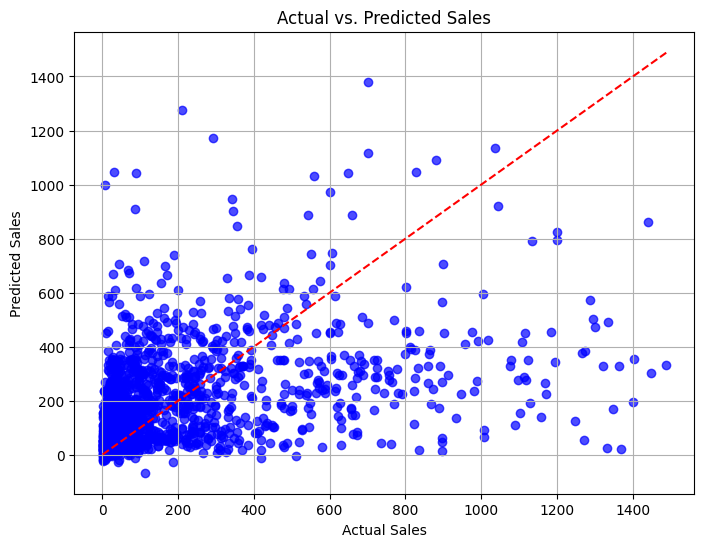

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.grid(True)
plt.show()

In [17]:
residuals = y_test - y_pred

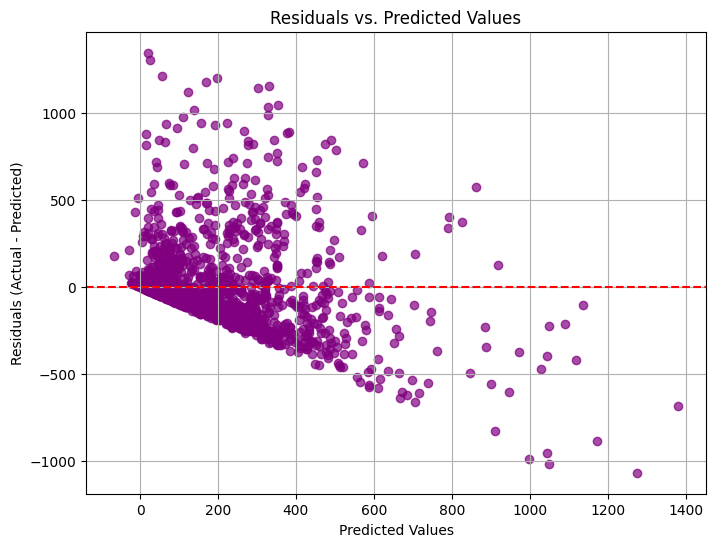

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')  # reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.show()

In [19]:
os.chdir("../models")
print(os.getcwd())

/workspaces/4Geeks_final_project/models


In [20]:
import pickle

with open("price_predictor.pkl", "wb") as f:
    pickle.dump(best_model, f)